# Length search


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
hard = pd.read_csv('../results/1-hard-length_search.csv')
easy = pd.read_csv('../results/1-easy-length_search.csv')
alphas = sorted(hard.alpha.unique())

In [21]:
hard.scheme.unique()

array(['LOO', 'hv-block', 'h-block', '5-fold', '10-fold', 'LFO-pw',
       'LFO-joint'], dtype=object)

In [22]:
scheme_types = {
    'Pointwise': ['LOO', 'h-block'],
    'Joint': ['hv-block', '10-fold', '5-fold', 'LFO-joint']
}

In [23]:
table = []
for scheme_type, schemes in scheme_types.items():
    for s in schemes:
        rec = {
            'evaluation': scheme_type,
            'scheme': s,
        }
        for a in alphas:
            tmin = easy[(easy.alpha == a) & (easy.scheme == s)].Tmin
            rec[f'easy {a}'] = int(tmin) if len(tmin) > 0 else None
        for a in alphas:
            tmin = hard[(hard.alpha == a) & (hard.scheme == s)].Tmin
            rec[f'hard {a}'] = int(tmin) if len(tmin) > 0 else None
        table.append(rec)
tabledf = pd.DataFrame(table)
tabledf

,evaluation,scheme,easy 0.0,easy 0.25,easy 0.5,easy 0.75,easy 1.0,hard 0.0,hard 0.25,hard 0.5,hard 0.75,hard 1.0
0,Pointwise,LOO,25,25,25,25,236,112,109,109,322,1640
1,Pointwise,h-block,25,25,26,42,235,112,112,115,339,1640
2,Joint,hv-block,25,25,25,25,22,118,118,118,120,155
3,Joint,10-fold,30,30,29,25,20,120,120,120,130,160
4,Joint,5-fold,25,25,25,25,26,120,124,124,125,147
5,Joint,LFO-joint,28,28,29,29,27,156,156,156,156,162


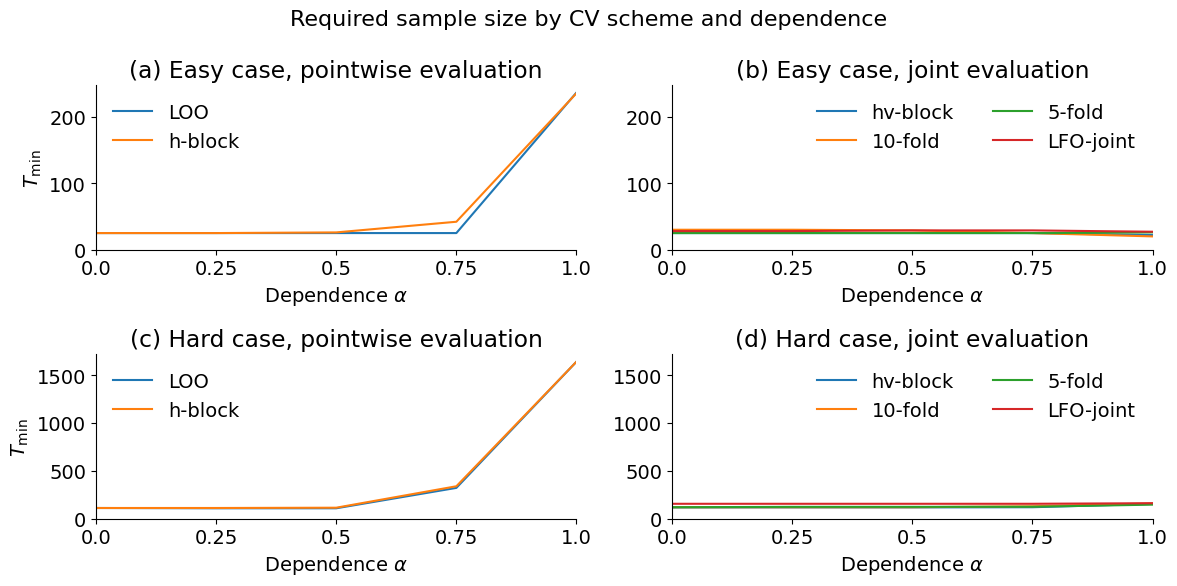

In [24]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,6), sharey='row', sharex=True)

plt.rc('font', size=14)
m = 5

for i, (eval, axcol) in enumerate(zip(['Pointwise', 'Joint'], axes.T)):
    schemes = tabledf[tabledf.evaluation == eval].scheme.unique()
    for scheme in schemes:
        df = tabledf[(tabledf.evaluation == eval) & (tabledf.scheme == scheme)]
        df = df.drop(columns=['evaluation', 'scheme'])
        axcol[0].plot(alphas, df.iloc[0][:m])
        axcol[1].plot(alphas, df.iloc[0][m:])
    axcol[0].set_title(f'({chr(ord("a")+0+i)}) Easy case, {eval.lower()} evaluation')
    axcol[1].set_title(f'({chr(ord("a")+2+i)}) Hard case, {eval.lower()} evaluation')
    axcol[1].yaxis.set_ticks([0, 500, 1000, 1500])
    if i == 0:
        for ax in axcol:
            ax.set_ylabel('$T_{\\mathrm{min}}$', fontsize=14)

    for ax in axcol:
        ax.legend(schemes, frameon=False, ncol=2 if len(schemes) > 2 else 1)
        ax.set_xlim(0,1)

for ax in axes.ravel():
    ax.set_ylim(bottom=0)
    ax.set_xticks(alphas)
    ax.set_xticklabels(alphas)
    ax.xaxis.tick_bottom()
    ax.xaxis.set_tick_params(labelbottom=True)
    ax.set_xlabel(r'Dependence $\alpha$')
    # Hide the right and top spines
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

fig.suptitle('Required sample size by CV scheme and dependence', fontsize=16)

fig.subplots_adjust(wspace=0)
fig.tight_layout()
fig.savefig('../../paper/figures/min-sample-size.pdf', bbox_inches='tight')